# Time - independent solutions

## Wavefunction in SHM potential using EVP

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as lin
plt.style.use("seaborn-whitegrid")
%matplotlib inline

In [3]:
L = 6.
delta = 10**(-2)
N = int(L/delta)
x = np.arange(-L,L+delta,delta)
V0 = 5

In [6]:
def potential(x):
    return x**2

def kronecker(i,j):
    return 1 if i==j else 0

def h(i,j): # The Hamiltonian operator defined here
    return ((2*kronecker(i,j) - kronecker(i-1,j) - kronecker(i+1,j) )/(delta**2)) + potential(delta*i)*kronecker(i,j)

# defining the Hermitian Hamiltonian matrix 
H = np.array( [ [h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] )
H_values , H_vectors = lin.eig(H) # finding eigenvalues and eigenvectors for the H matrix
indx = H_values.argsort()
H_values = H_values[indx] # sorting then from lowest to highest 
H_vectors = H_vectors[:,indx]

In [7]:
state = np.arange(2)
pot = potential(x)/100
H_eigenvectors=H_vectors/100
eigh = H_values[state]/100
xsi = (H_eigenvectors[:,state]*10 + eigh )

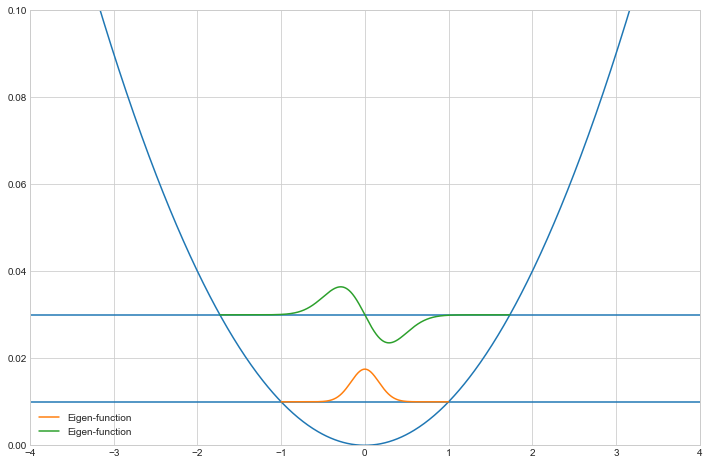

In [8]:
plt.figure(figsize=((12,8)))
plt.plot(x,pot)
plt.hlines(H_values[state]/100,-L,L)
plt.plot(np.linspace(-np.sqrt(100*eigh),np.sqrt(100*eigh),1201),xsi,label="Eigen-function")
plt.legend()
plt.ylim(0,0.1)
plt.xlim(-4,4)
plt.show()

## Solving for a potential well

In [10]:
%reset
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as lin
plt.style.use("seaborn-whitegrid")
%matplotlib inline

L = 6.
delta = 10**(-2)
N = int(L/delta)
x = np.arange(-L,L+delta,delta)
V0 = 5

Nothing done.


In [14]:
def potential(x):
    return -2 if abs(x) <0.5 else 0

def kronecker(i,j):
    return 1 if i==j else 0

def h(i,j): # The Hamiltonian operator defined here
    return ((2*kronecker(i,j) - kronecker(i-1,j) - kronecker(i+1,j) )/(delta**2)) + potential(delta*i)*kronecker(i,j)

# defining the Hermitian Hamiltonian matrix 
H = np.array( [ [h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] )
H_values , H_vectors = lin.eig(H) # finding eigenvalues and eigenvectors for the H matrix
indx = H_values.argsort()
H_values = H_values[indx] # sorting then from lowest to highest 
H_vectors = H_vectors[:,indx]

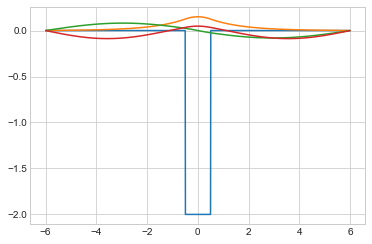

In [29]:
pot = np.array([potential(i) for i in x])
plt.plot(x,pot)
plt.plot(x,H_vectors[:,[0,1,2]]*2)
plt.show()

## For H-atom potential

In [241]:
%reset
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as lin
plt.style.use("seaborn-whitegrid")
%matplotlib inline

L = 6.
delta = 10**(-2)
N = int(L/delta)
x = np.arange(.5,2*L,delta)

Nothing done.


In [245]:
len(x)

1150

In [250]:
a = 0.25 # screening power, between 0 - 1 
def potential(x):
    global a 
    return (-2/x)*np.exp(a*x) if x!=0 else 10**(3)

def kronecker(i,j):
    return 1 if i==j else 0

def h(i,j): # The Hamiltonian operator defined here
    return ((2*kronecker(i,j) - kronecker(i-1,j) - kronecker(i+1,j) )/(delta**2)) + potential(delta*i)*kronecker(i,j)

# defining the Hermitian Hamiltonian matrix 
H = np.array( [ [h(i,j) for i in range(1,len(x)+1)] for j in range(1,len(x)+1)] )
H_values , H_vectors = lin.eig(H) # finding eigenvalues and eigenvectors for the H matrix
indx = H_values.argsort()
H_values = H_values[indx] # sorting then from lowest to highest 
H_vectors = H_vectors[:,indx]

In [249]:
len(H)

2300

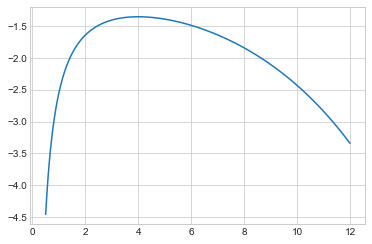

In [247]:
pot = np.array([potential(i) for i in x])
plt.plot(x[1:],pot[1:])

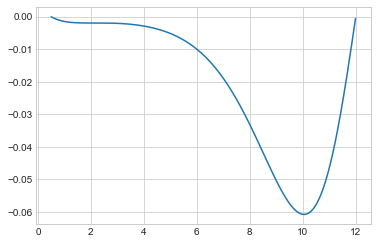

In [251]:
plt.plot(x,H_vectors[:,0])

plt.show()

# Time evolution of Gaussian wavepacket

In [185]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
%matplotlib inline

In [186]:
def gaussian(x,mean,std, p):
    return np.exp((-(1/2)*((x-mean)/std)**2) + 1.0j*p*x)/(std * np.sqrt(2 * np.pi))

0.9999999999999998


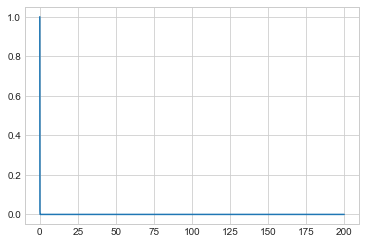

In [187]:
L = 100.
delta = 0.1
N = int(L/delta)
x = np.arange(0.01,2*L,delta)

mean = -10
std = 0.5
p = 1  # non-dim momentum 


psi0 = gaussian(x,mean,std,p)
psi0_norm = psi0 / np.sqrt(np.dot(np.conjugate(psi0.T),psi0))
print(abs(np.vdot(psi0_norm,psi0_norm)))
plt.plot(x,psi0_norm.real)
plt.show()

In [188]:
def potential(x):
    return -2/x if x!=0 else 1e4

def kronecker(i,j):
    return 1 if i==j else 0

def h(i,j): # The Hamiltonian operator defined here
    return ((2*kronecker(i,j) - kronecker(i-1,j) - kronecker(i+1,j) )/(delta**2)) + potential(delta*i)*kronecker(i,j)

# defining the Hermitian Hamiltonian matrix 
H = np.array( [ [h(i,j) for i in range(1,2*N+1)] for j in range(1,2*N+1)] )
H_values , H_vectors = lin.eig(H) # finding eigenvalues and eigenvectors for the H matrix
indx = H_values.argsort()
H_values = H_values[indx] # sorting then from lowest to highest 
H_vectors = H_vectors[:,indx]

In [189]:
len(H)

2000

In [190]:
n_states = 1500 # taking first n_states
states = np.arange(n_states)
C = np.dot(np.conjugate(H_vectors[:,states].T),psi0_norm)
print(np.sum(abs(C**2)))
pot = np.array([potential(i) for i in x])

0.945839432938647


In [191]:
def time_WF(t):
    Total_wf = np.zeros(len(x),dtype='complex')
    for i in range(n_states):
        Total_wf += C[i]*H_vectors[:,i]*np.exp(-1.0j*H_values[i]*t)
    return Total_wf
def Prob_Density(t):
    WF = time_WF(t)
    return abs(WF)**2


In [192]:
# TO create a slider plot with time.
from ipywidgets import interact, widgets

# Define the function to plot (you can replace this with your own function)
def plot_function(t=0.0):
    y = Prob_Density(t)  # Example: Linear function ax + b

    plt.figure(figsize=(8, 8))
    plt.plot(x, y, label=f'{t}')
    plt.title('Dynamic Function Plot')
    plt.plot(x,pot*0.01)
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.ylim(-0.09,0.12)
    plt.grid(True)
    plt.legend()
    plt.show()

# Create interactive sliders for function parameters
interact(
    plot_function,
    t=widgets.FloatSlider(value=0.0, min=0.0, max=10.0, step=.01, description='t')
)

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, step=0.01), Output()), _dom_classes=('…

<function __main__.plot_function(t=0.0)>

In [171]:
t = 8.0
mod_wf = Prob_Density(t)

R = T = 0

for i in range(len(mod_wf)):
    if x[i]<= -0.5:
        R+=mod_wf[i]
    elif x[i]>= 0.5:
        T+=mod_wf[i]

print(T)

0.9454274016431281


# Shooting Method - SHM potential

In [221]:
%reset
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
%matplotlib inline

Nothing done.


In [222]:
def F(x,E): # definded for SHM potential only 
    return (x**2 - E)

def y(x,h,E):
    return 1 - ((h**2)/12)*F(x,E)

In [223]:
def Numerov(x_0,x_f,E):

    h = 10**(-4)
    N = int((x_f-x_0)/h)

    x = np.linspace(x_0,x_f,N)
    wave_f = np.zeros(N,dtype='complex')
    wave_f[0] = wave_f[-1]= 0
    wave_f[1] = wave_f[0] + h**5

    for i in range(1,N-1):
        wave_f[i+1] = (wave_f[i]*(12-10*y(x[i],h,E)) - wave_f[i-1]*y(x[i-1],h,E))/y(x[i+1],h,E)
    return x,wave_f

def f(x_0,x_f,y_boundary,E_guess):
    dummy_x , y = Numerov(x_0,x_f,E_guess)
    return y[-1] - y_boundary


In [226]:
def bisection(x_0,x_f,E_guess_1,E_guess_2,y_boundary):
    y_1 = f(x_0,x_f,y_boundary,E_guess_1)
    y_2 = f(x_0,x_f,y_boundary,E_guess_2)

    while (abs(E_guess_1-E_guess_2)>10**(-7)):
        if y_1*y_2 > 0:
            print("Invalid guess, please try again")
            E_guess_new = 0
            break
        else:
            E_guess_new = (E_guess_1+E_guess_2)/2
            y_new = f(x_0,x_f,y_boundary,E_guess_new)
            if y_1*y_new < 0:
                E_guess_2 = E_guess_new
            else:
                E_guess_1 = E_guess_new
    return E_guess_new

Energy is :5.000050134956837 for state: 2


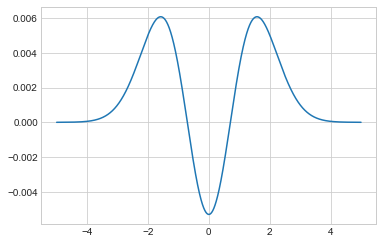

In [232]:
L = 5
E_guess_1 =3.5
E_guess_2 = 7

def solve_schrodinger(E_guess_1,E_guess_2,shoot,x0=-L,xf=L):
    E_f = shoot(x0,xf,E_guess_1,E_guess_2,0) # we want Xi[-1] = Xi[0] = 0 as boundary condition.
    
    xaxis , Wf = Numerov(x0,xf,E_f)

    node_counter = 0
    for i in range(1,len(Wf)-2):
        if Wf[i]*Wf[i-1]<0: # checking if the product of consecutive terms is negative.
            node_counter+=1
        else:
            continue

    Wf = Wf/np.sqrt(np.dot(np.conjugate(Wf.T),Wf))
    # Returning Normalized Wave function, Energy Value and state of WF.
    return xaxis,Wf,E_f,node_counter


# Normalizing the wavefunction.
x,Wave_f,En,n = solve_schrodinger(E_guess_1,E_guess_2,bisection,x0=-L,xf=L)

print(f'Energy is :{En.real} for state: {n}')
plt.plot(x,Wave_f.real)
plt.show()